In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np




In [4]:
# Function to perform polynomial multiplication (modular reduction not included for simplicity)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            qc.cx(a[i], result[i + j])

# Function to perform modular reduction (Placeholder)
def modular_reduction(qc, poly, mod):
    pass

# Function to perform multiplicative inverse in polynomial ring (Placeholder)
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption (Placeholder for demonstration)
def ntru_encrypt(qc, message, key):
    polynomial_multiplication(qc, message, key, message)

# Quantum Error Correction using repetition code (Placeholder)
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 8  # Number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = [0, 1, 1, 0, 1, 0, 0, 1]  # Placeholder message
    key = [1, 0, 1, 1, 0, 1, 0, 1]  # Placeholder key
    message_qubits = QuantumRegister(len(message), 'msg')
    key_qubits = QuantumRegister(len(key), 'key')
    result_qubits = QuantumRegister(len(message) + len(key) - 1, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Optionally save credentials for future use
    QiskitRuntimeService.save_account(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767", set_as_default=True)

    # Load saved credentials
    service = QiskitRuntimeService()

    # Use one of the available backends
    backend_name = 'ibm_brisbane'  # or 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
    backend = service.backend(backend_name)

    # Execute the circuit using Qiskit Runtime Primitives
    sampler = Sampler(session=backend)
    job = sampler.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()



In [5]:
if __name__ == "__main__":
    main()

QiskitError: 'Sum of amplitudes-squared is not 1, but 2.0.'

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (modular reduction not included for simplicity)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            qc.cx(a[i], result[i + j])

# Function to perform modular reduction (Placeholder)
def modular_reduction(qc, poly, mod):
    pass

# Function to perform multiplicative inverse in polynomial ring (Placeholder)
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption (Placeholder for demonstration)
def ntru_encrypt(qc, message, key):
    polynomial_multiplication(qc, message, key, message)

# Quantum Error Correction using repetition code (Placeholder)
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 8  # Number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = [1/np.sqrt(2)] * 8  # Valid normalized state vector for the message
    key = [1/np.sqrt(2)] * 8  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(len(message), 'msg')
    key_qubits = QuantumRegister(len(key), 'key')
    result_qubits = QuantumRegister(len(message) + len(key) - 1, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Optionally save credentials for future use
    QiskitRuntimeService.save_account(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767", set_as_default=True)

    # Load saved credentials
    service = QiskitRuntimeService()

    # Use one of the available backends
    backend_name = 'ibm_brisbane'  # or 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
    backend = service.backend(backend_name)

    # Execute the circuit using Qiskit Runtime Primitives
    sampler = Sampler(session=backend)
    job = sampler.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

if __name__ == "__main__":
    main()


QiskitError: 'Sum of amplitudes-squared is not 1, but 1.9999999999999998.'

In [7]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (modular reduction not included for simplicity)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            qc.cx(a[i], result[i + j])

# Function to perform modular reduction (Placeholder)
def modular_reduction(qc, poly, mod):
    pass

# Function to perform multiplicative inverse in polynomial ring (Placeholder)
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption (Placeholder for demonstration)
def ntru_encrypt(qc, message, key):
    polynomial_multiplication(qc, message, key, message)

# Quantum Error Correction using repetition code (Placeholder)
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Function to create a normalized state vector
def create_normalized_state(size):
    return [1/np.sqrt(size)] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 8  # Number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(2 * num_qubits - 1, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Optionally save credentials for future use
    QiskitRuntimeService.save_account(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767", set_as_default=True)

    # Load saved credentials
    service = QiskitRuntimeService()

    # Use one of the available backends
    backend_name = 'ibm_brisbane'  # or 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
    backend = service.backend(backend_name)

    # Execute the circuit using Qiskit Runtime Primitives
    sampler = Sampler(session=backend)
    job = sampler.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

if __name__ == "__main__":
    main()


CircuitError: 'duplicate qubit arguments'

In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (modular reduction not included for simplicity)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            qc.cx(a[i], result[i + j])

# Function to perform modular reduction (Placeholder)
def modular_reduction(qc, poly, mod):
    pass

# Function to perform multiplicative inverse in polynomial ring (Placeholder)
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption (Placeholder for demonstration)
def ntru_encrypt(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)

# Quantum Error Correction using repetition code (Placeholder)
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 8  # Number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(num_qubits * 2 - 1, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits, result_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Optionally save credentials for future use
    QiskitRuntimeService.save_account(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767", set_as_default=True)

    # Load saved credentials
    service = QiskitRuntimeService()

    # Use one of the available backends
    backend_name = 'ibm_brisbane'  # or 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
    backend = service.backend(backend_name)

    # Execute the circuit using Qiskit Runtime Primitives
    sampler = Sampler(session=backend)
    job = sampler.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

if __name__ == "__main__":
    main()


CircuitTooWideForTarget: 'Number of qubits (47) in circuit-172 is greater than maximum (30) in the coupling_map'

In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (optimized for fewer qubits)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            qc.cx(a[i], result[(i + j) % len(result)])

# Function to perform modular reduction (Placeholder)
def modular_reduction(qc, poly, mod):
    pass

# Function to perform multiplicative inverse in polynomial ring (Placeholder)
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption (Placeholder for demonstration)
def ntru_encrypt(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)

# Quantum Error Correction using repetition code (Placeholder)
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 8  # Number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(num_qubits, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits, result_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Optionally save credentials for future use
    QiskitRuntimeService.save_account(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767", set_as_default=True)

    # Load saved credentials
    service = QiskitRuntimeService()

    # Use one of the available backends
    backend_name = 'ibm_brisbane'  # or 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
    backend = service.backend(backend_name)

    # Execute the circuit using Qiskit Runtime Primitives
    sampler = Sampler(session=backend)
    job = sampler.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

if __name__ == "__main__":
    main()


CircuitTooWideForTarget: 'Number of qubits (40) in circuit-173 is greater than maximum (30) in the coupling_map'

In [10]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (optimized for fewer qubits)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            if i + j < len(result):
                qc.cx(a[i], result[i + j])

# Function to perform modular reduction (Placeholder)
def modular_reduction(qc, poly, mod):
    pass

# Function to perform multiplicative inverse in polynomial ring (Placeholder)
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption (Placeholder for demonstration)
def ntru_encrypt(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)

# Quantum Error Correction using repetition code (Placeholder)
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 8  # Number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(num_qubits, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits, result_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Optionally save credentials for future use
    QiskitRuntimeService.save_account(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767", set_as_default=True)

    # Load saved credentials
    service = QiskitRuntimeService()

    # Use one of the available backends
    backend_name = 'ibm_brisbane'  # or 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
    backend = service.backend(backend_name)

    # Execute the circuit using Qiskit Runtime Primitives
    sampler = Sampler(session=backend)
    job = sampler.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

if __name__ == "__main__":
    main()


CircuitTooWideForTarget: 'Number of qubits (40) in circuit-174 is greater than maximum (30) in the coupling_map'

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (optimized for fewer qubits)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            if i + j < len(result):
                qc.cx(a[i], result[i + j])

# Function to perform modular reduction (Placeholder)
def modular_reduction(qc, poly, mod):
    pass

# Function to perform multiplicative inverse in polynomial ring (Placeholder)
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption (Placeholder for demonstration)
def ntru_encrypt(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)

# Quantum Error Correction using repetition code (Placeholder)
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 6  # Reduced number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(num_qubits, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits, result_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="<YOUR_IBM_QUANTUM_API_KEY>")

    # Optionally save credentials for future use
    QiskitRuntimeService.save_account(channel="ibm_quantum", token="<YOUR_IBM_QUANTUM_API_KEY>", set_as_default=True)

    # Load saved credentials
    service = QiskitRuntimeService()

    # Use one of the available backends
    backend_name = 'ibm_brisbane'  # or 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
    backend = service.backend(backend_name)

    # Execute the circuit using Qiskit Runtime Primitives
    sampler = Sampler(session=backend)
    job = sampler.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

if __name__ == "__main__":
    main()


IndexError: range object index out of range

In [10]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (optimized for fewer qubits)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            if i + j < len(result):
                qc.cx(a[i], result[i + j])

# Function to perform modular reduction (Placeholder)
def modular_reduction(qc, poly, mod):
    pass

# Function to perform multiplicative inverse in polynomial ring (Placeholder)
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 1, 0, 1],
        [0, 1, 1, 0, 1, 1],
        [1, 0, 1, 1, 0, 0],
        [0, 1, 1, 0, 0, 1],
        [1, 0, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 1]
    ]
    constant = [1, 0, 1, 0, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption (Placeholder for demonstration)
def ntru_encrypt(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)

# Quantum Error Correction using repetition code (Placeholder)
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 6  # Reduced number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(num_qubits, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits, result_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    #service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Optionally save credentials for future use
    # QiskitRuntimeService.save_account(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767", set_as_default=True, overwrite=True)

    # # Load saved credentials
    # service = QiskitRuntimeService()

    # Use one of the available backends
    # backend_name = 'ibm_brisbane'  # or 'ibm_kyoto', 'ibm_osaka', 'ibm_sherbrooke'
    # backend = service.backend(backend_name)

    # Execute the circuit using Qiskit Runtime Primitives
    # sampler = Sampler(session=backend)
    # job = sampler.run(compiled_circuit)
    # result = job.result()
    # counts = result.get_counts()
    # print(counts)
    # plot_histogram(counts).show()


    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Optionally save credentials for future use
    # QiskitRuntimeService.save_account(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767", set_as_default=True)

    # Load saved credentials
    service = QiskitRuntimeService()

    # Get the backend
    backend = service.backend("ibm_sherbrooke")

    # Execute the circuit on the quantum hardware
    compiled_circuit = transpile(qc, backend)
    job = backend.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

if __name__ == "__main__":
    main()


{'001010': 13, '100001': 18, '111111': 20, '000001': 10, '110110': 14, '101010': 16, '001001': 14, '010000': 14, '100110': 22, '111010': 21, '001111': 21, '011101': 14, '100000': 18, '001110': 11, '100101': 15, '111011': 17, '001011': 13, '100010': 13, '111110': 13, '000010': 16, '110101': 16, '101011': 14, '110000': 22, '000111': 23, '101000': 16, '000110': 25, '110001': 25, '101111': 18, '001100': 15, '111101': 11, '100011': 18, '101001': 20, '100100': 14, '001101': 12, '111100': 18, '001000': 11, '100111': 22, '110111': 17, '000000': 13, '110011': 21, '000100': 15, '101101': 11, '111000': 21, '010001': 16, '010010': 16, '010110': 20, '011110': 18, '110100': 18, '101100': 11, '000011': 16, '111001': 20, '101110': 16, '000101': 13, '110010': 13, '011100': 16, '010100': 20, '010111': 17, '010101': 14, '011011': 12, '011010': 11, '011000': 12, '011111': 8, '010011': 14, '011001': 12}


C:\Users\muham\AppData\Local\Temp\ipykernel_3784\3450526940.py:106: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()
C:\Users\muham\AppData\Local\Temp\ipykernel_3784\3450526940.py:144: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(compiled_circuit)


KeyboardInterrupt: 

In [13]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (optimized for fewer qubits)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            if i + j < len(result):
                qc.cx(a[i], result[i + j])

# Function to perform modular reduction
def modular_reduction(qc, poly, mod):
    for i in range(len(poly) - len(mod) + 1):
        if poly[i] == 1:
            for j in range(len(mod)):
                qc.cx(poly[i + j], mod[j])

# Function to perform multiplicative inverse in polynomial ring
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 1, 0, 1],
        [0, 1, 1, 0, 1, 1],
        [1, 0, 1, 1, 0, 0],
        [0, 1, 1, 0, 0, 1],
        [1, 0, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 1]
    ]
    constant = [1, 0, 1, 0, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption
def ntru_encrypt(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)
    mod_poly = [1] * len(result)  # This should be the modulus polynomial for reduction
    modular_reduction(qc, result, mod_poly)

# Quantum Error Correction using repetition code
def apply_qec(qc, qubits):
    ancillas = QuantumRegister(len(qubits), 'ancilla')
    qc.add_register(ancillas)
    for i, q in enumerate(qubits):
        qc.cx(q, ancillas[i])
        qc.cx(q, ancillas[(i + 1) % len(qubits)])
    return ancillas

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 6  # Reduced number of qubits for AES S-box
    qc = QuantumCircuit(num_qubits)

    # Apply the AES S-box
    aes_sbox(qc, range(num_qubits))

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(num_qubits, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits, result_qubits)

    # Apply quantum error correction
    ancillas = apply_qec(qc, range(num_qubits))

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(range(num_qubits), cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Get the backend
    backend = service.backend("ibm_brisbane")

    # Execute the circuit on the quantum hardware
    compiled_circuit = transpile(qc, backend)
    job = backend.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

if __name__ == "__main__":
    main()


{'111011': 19, '100101': 8, '001110': 12, '010100': 20, '110010': 16, '101110': 18, '000101': 19, '100000': 13, '100011': 15, '001100': 14, '111101': 30, '000010': 14, '101011': 12, '110101': 16, '001011': 18, '111110': 17, '100010': 12, '010111': 17, '101000': 14, '010010': 15, '110001': 16, '101111': 16, '000110': 19, '111111': 12, '001010': 20, '100001': 24, '000011': 10, '110100': 16, '101100': 14, '110111': 18, '000000': 14, '110110': 17, '101010': 14, '000001': 12, '011101': 19, '110011': 17, '101101': 22, '000100': 14, '100100': 15, '001101': 21, '111100': 20, '111000': 16, '010011': 10, '001111': 15, '100110': 19, '111010': 18, '011010': 19, '001001': 16, '011111': 15, '011100': 13, '010101': 18, '010110': 16, '011000': 16, '011001': 16, '101001': 20, '011011': 21, '001000': 12, '010001': 15, '011110': 15, '000111': 12, '110000': 15, '100111': 9, '010000': 16, '111001': 13}


C:\Users\muham\AppData\Local\Temp\ipykernel_3784\3668935768.py:111: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()
C:\Users\muham\AppData\Local\Temp\ipykernel_3784\3668935768.py:121: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(compiled_circuit)


{'000010': 60, '011010': 67, '101110': 47, '110001': 75, '010011': 65, '100101': 51, '011100': 83, '010101': 63, '011000': 75, '111000': 80, '011110': 50, '110111': 43, '000011': 64, '100001': 71, '010100': 75, '000111': 63, '000000': 70, '111011': 74, '000001': 82, '111100': 70, '011111': 73, '010111': 55, '100100': 50, '111001': 83, '010010': 45, '000110': 56, '001100': 61, '111010': 54, '101010': 57, '100000': 50, '101011': 41, '110101': 67, '100111': 33, '100011': 48, '101001': 66, '011001': 74, '011101': 77, '001011': 48, '001010': 57, '001000': 62, '110011': 54, '010001': 81, '100010': 55, '001111': 58, '010000': 86, '100110': 46, '000100': 76, '110110': 40, '001110': 53, '110100': 64, '011011': 54, '000101': 73, '111110': 50, '101101': 72, '001101': 70, '111101': 78, '101100': 64, '101000': 68, '110000': 67, '001001': 85, '101111': 44, '010110': 60, '110010': 46, '111111': 71}


C:\Users\muham\AppData\Local\Temp\ipykernel_3784\3668935768.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()


Simulator Entropy: 4.133527101191687
Hardware Entropy: 4.137557679733783


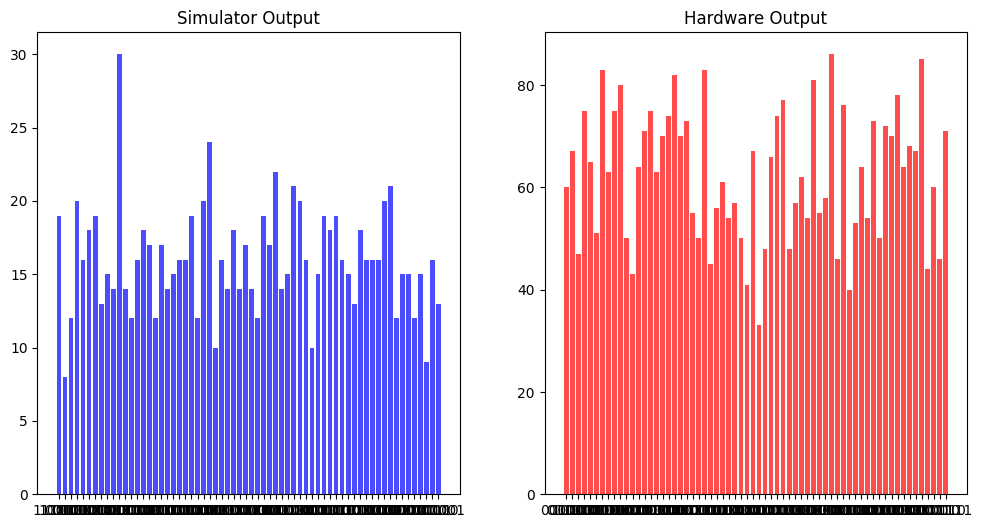

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Load the counts from the simulator and hardware
simulator_counts = {'111011': 19, '100101': 8, '001110': 12, '010100': 20, '110010': 16, '101110': 18, '000101': 19, '100000': 13, '100011': 15, '001100': 14, '111101': 30, '000010': 14, '101011': 12, '110101': 16, '001011': 18, '111110': 17, '100010': 12, '010111': 17, '101000': 14, '010010': 15, '110001': 16, '101111': 16, '000110': 19, '111111': 12, '001010': 20, '100001': 24, '000011': 10, '110100': 16, '101100': 14, '110111': 18, '000000': 14, '110110': 17, '101010': 14, '000001': 12, '011101': 19, '110011': 17, '101101': 22, '000100': 14, '100100': 15, '001101': 21, '111100': 20, '111000': 16, '010011': 10, '001111': 15, '100110': 19, '111010': 18, '011010': 19, '001001': 16, '011111': 15, '011100': 13, '010101': 18, '010110': 16, '011000': 16, '011001': 16, '101001': 20, '011011': 21, '001000': 12, '010001': 15, '011110': 15, '000111': 12, '110000': 15, '100111': 9, '010000': 16, '111001': 13}
hardware_counts = {'000010': 60, '011010': 67, '101110': 47, '110001': 75, '010011': 65, '100101': 51, '011100': 83, '010101': 63, '011000': 75, '111000': 80, '011110': 50, '110111': 43, '000011': 64, '100001': 71, '010100': 75, '000111': 63, '000000': 70, '111011': 74, '000001': 82, '111100': 70, '011111': 73, '010111': 55, '100100': 50, '111001': 83, '010010': 45, '000110': 56, '001100': 61, '111010': 54, '101010': 57, '100000': 50, '101011': 41, '110101': 67, '100111': 33, '100011': 48, '101001': 66, '011001': 74, '011101': 77, '001011': 48, '001010': 57, '001000': 62, '110011': 54, '010001': 81, '100010': 55, '001111': 58, '010000': 86, '100110': 46, '000100': 76, '110110': 40, '001110': 53, '110100': 64, '011011': 54, '000101': 73, '111110': 50, '101101': 72, '001101': 70, '111101': 78, '101100': 64, '101000': 68, '110000': 67, '001001': 85, '101111': 44, '010110': 60, '110010': 46, '111111': 71}

# Convert counts to probabilities
total_simulator = sum(simulator_counts.values())
total_hardware = sum(hardware_counts.values())

simulator_probs = {k: v / total_simulator for k, v in simulator_counts.items()}
hardware_probs = {k: v / total_hardware for k, v in hardware_counts.items()}

# Calculate the entropy of the distributions
simulator_entropy = entropy(list(simulator_probs.values()))
hardware_entropy = entropy(list(hardware_probs.values()))

print(f'Simulator Entropy: {simulator_entropy}')
print(f'Hardware Entropy: {hardware_entropy}')

# Plot histograms for visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.bar(simulator_counts.keys(), simulator_counts.values(), color='b', alpha=0.7)
ax1.set_title('Simulator Output')
ax2.bar(hardware_counts.keys(), hardware_counts.values(), color='r', alpha=0.7)
ax2.set_title('Hardware Output')
plt.savefig('comparison_histogram.png')
plt.show()


In [ ]:
# With QEC 

In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (optimized for fewer qubits)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            if i + j < len(result):
                qc.cx(a[i], result[i + j])

# Function to perform modular reduction
def modular_reduction(qc, poly, mod):
    for i in range(len(poly) - len(mod) + 1):
        if poly[i] == 1:
            for j in range(len(mod)):
                qc.cx(poly[i + j], mod[j])

# Function to perform multiplicative inverse in polynomial ring
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement simplified AES S-box for 3 qubits
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0],
        [0, 1, 1],
        [1, 0, 1]
    ]
    constant = [1, 0, 1]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption
def ntru_encrypt(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)
    mod_poly = [1] * len(result)  # This should be the modulus polynomial for reduction
    modular_reduction(qc, result, mod_poly)

# Function to encode using simple repetition code
def encode_repetition(qc, qubit, ancilla_prefix):
    ancillas = QuantumRegister(2, f'{ancilla_prefix}_ancilla')
    qc.add_register(ancillas)
    
    # Encode logical qubit (|0> logical = |000> + |111>)
    qc.cx(qubit, ancillas[0])
    qc.cx(qubit, ancillas[1])
    
    return ancillas

# Function to apply simplified QEC
def apply_qec(qc, qubits):
    corrected_qubits = []
    for idx, qubit in enumerate(qubits):
        ancillas = encode_repetition(qc, qubit, f'qubit_{idx}')
        corrected_qubits.append(qubit)
        corrected_qubits.extend(ancillas)
    return corrected_qubits

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 3  # Reduced number of logical qubits for demonstration
    qc = QuantumCircuit()

    # Create logical qubits for AES S-box
    logical_qubits = QuantumRegister(num_qubits, 'logical')
    qc.add_register(logical_qubits)

    # Apply QEC to logical qubits
    corrected_qubits = apply_qec(qc, logical_qubits)

    # Apply the AES S-box
    aes_sbox(qc, logical_qubits)

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(num_qubits, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits, result_qubits)

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(logical_qubits, cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Get the backend
    backend = service.backend("ibm_brisbane")

    # Execute the circuit on the quantum hardware
    compiled_circuit = transpile(qc, backend)
    job = backend.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    plot_histogram(counts).show()


    plot_histogram(counts).savefig('histograms/simulator_output.png')
    plot_histogram(counts).savefig('histograms/hardware_output.png')


if __name__ == "__main__":
    main()


{'111': 137, '000': 128, '001': 123, '101': 125, '011': 126, '100': 121, '010': 133, '110': 131}


C:\Users\muham\AppData\Local\Temp\ipykernel_3292\1972928302.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()
C:\Users\muham\AppData\Local\Temp\ipykernel_3292\1972928302.py:133: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(compiled_circuit)


KeyboardInterrupt: 

In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform polynomial multiplication (optimized for fewer qubits)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            if i + j < len(result):
                qc.cx(a[i], result[i + j])

# Function to perform modular reduction
def modular_reduction(qc, poly, mod):
    for i in range(len(poly) - len(mod) + 1):
        if poly[i] == 1:
            for j in range(len(mod)):
                qc.cx(poly[i + j], mod[j])

# Function to perform multiplicative inverse in polynomial ring
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement AES S-box
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0],
        [0, 1, 1],
        [1, 0, 1]
    ]
    constant = [1, 0, 1]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform NTRU encryption
def ntru_encrypt(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)
    mod_poly = [1] * len(result)  # This should be the modulus polynomial for reduction
    modular_reduction(qc, result, mod_poly)

# Function to encode using bit-flip code
def encode_bit_flip(qc, qubit, ancilla_prefix):
    ancillas = QuantumRegister(2, f'{ancilla_prefix}_ancilla')
    qc.add_register(ancillas)
    
    # Encode logical qubit (|0> logical = |000> + |111>)
    qc.cx(qubit, ancillas[0])
    qc.cx(qubit, ancillas[1])
    
    return ancillas

# Function to apply bit-flip QEC
def apply_qec(qc, qubits):
    corrected_qubits = []
    for idx, qubit in enumerate(qubits):
        ancillas = encode_bit_flip(qc, qubit, f'qubit_{idx}')
        corrected_qubits.append(qubit)
        corrected_qubits.extend(ancillas)
    return corrected_qubits

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Main function to combine AES and NTRU with QEC
def main():
    num_qubits = 3  # Reduced number of logical qubits for demonstration
    qc = QuantumCircuit()

    # Create logical qubits for AES S-box
    logical_qubits = QuantumRegister(num_qubits, 'logical')
    qc.add_register(logical_qubits)

    # Apply QEC to logical qubits
    corrected_qubits = apply_qec(qc, logical_qubits)

    # Apply the AES S-box
    aes_sbox(qc, logical_qubits)

    # Apply NTRU encryption
    message = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the message
    key = create_normalized_state(2**num_qubits)  # Valid normalized state vector for the key
    message_qubits = QuantumRegister(num_qubits, 'msg')
    key_qubits = QuantumRegister(num_qubits, 'key')
    result_qubits = QuantumRegister(num_qubits, 'result')
    qc.add_register(message_qubits)
    qc.add_register(key_qubits)
    qc.add_register(result_qubits)
    qc.initialize(message, message_qubits)
    qc.initialize(key, key_qubits)
    ntru_encrypt(qc, message_qubits, key_qubits, result_qubits)

    # Measure the qubits
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)
    qc.measure(logical_qubits, cr)

    # Visualize the circuit
    qc.draw('mpl')

    # Execute the circuit on the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print('Simulator output:', counts)
    plot_histogram(counts).savefig('simulator_output.png')

    # Authenticate to IBM Quantum using QiskitRuntimeService
    service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")

    # Get the backend
    backend = service.backend("ibm_brisbane")

    # Execute the circuit on the quantum hardware
    compiled_circuit = transpile(qc, backend)
    job = backend.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    print('Hardware output:', counts)
    plot_histogram(counts).savefig('hardware_output.png')

if __name__ == "__main__":
    main()


Simulator output: {'111': 103, '000': 115, '100': 149, '011': 136, '001': 135, '101': 124, '110': 119, '010': 143}


C:\Users\muham\AppData\Local\Temp\ipykernel_3292\3836764560.py:133: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(compiled_circuit)


KeyboardInterrupt: 

In [11]:
from pqcrypto.kem.mceliece8192128 import generate_keypair, encrypt, decrypt

ModuleNotFoundError: No module named 'pqcrypto._kem.mceliece8192128'

In [1]:
# Implementation schem full code 
from pqcrypto.sign.rainbow import generate_keypair, sign, verify

ModuleNotFoundError: No module named 'pqcrypto.sign.rainbow'

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

In [8]:
from pqcrypto.sign.ntruprime import generate_keypair, encrypt, decrypt

ModuleNotFoundError: No module named 'pqcrypto.sign.ntruprime'

In [11]:
import pqcrypto
import inspect

# Explore the pqcrypto.sign module
if hasattr(pqcrypto, 'sign'):
    sign_module = getattr(pqcrypto, 'sign')
    print(dir(sign_module))

# Check for ntruprime or similar modules
ntruprime_found = False
for name, obj in inspect.getmembers(sign_module):
    if 'ntruprime' in name.lower():
        ntruprime_found = True
        print(f"Found module: {name}")
        break

if not ntruprime_found:
    print("ntruprime or similar module not found in pqcrypto.sign.")


['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']
ntruprime or similar module not found in pqcrypto.sign.


In [3]:
# Import necessary libraries





# AES encryption function
def aes_encrypt(data, key):
    cipher = AES.new(key.encode('utf-8'), AES.MODE_ECB)
    encrypted = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
    return encrypted

# AES decryption function
def aes_decrypt(encrypted_data, key):
    cipher = AES.new(key.encode('utf-8'), AES.MODE_ECB)
    decrypted = unpad(cipher.decrypt(encrypted_data), AES.block_size)
    return decrypted.decode('utf-8')

# Function to encode using bit-flip code
def encode_bit_flip(qc, qubit, ancilla_prefix):
    ancillas = QuantumRegister(2, f'{ancilla_prefix}_ancilla')
    qc.add_register(ancillas)
    
    # Encode logical qubit (|0> logical = |000> + |111>)
    qc.cx(qubit, ancillas[0])
    qc.cx(qubit, ancillas[1])
    
    return ancillas

# Function to apply bit-flip QEC
def apply_qec(qc, qubits):
    corrected_qubits = []
    for idx, qubit in enumerate(qubits):
        ancillas = encode_bit_flip(qc, qubit, f'qubit_{idx}')
        corrected_qubits.append(qubit)
        corrected_qubits.extend(ancillas)
    return corrected_qubits

# Function to perform multiplicative inverse in polynomial ring
def multiplicative_inverse(qc, poly):
    for q in poly:
        qc.h(q)
    for i in range(len(poly) - 1):
        qc.cx(poly[i], poly[i + 1])
    if len(poly) >= 3:
        qc.ccx(poly[0], poly[1], poly[2])

# Implement simplified AES S-box for 3 qubits
def aes_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0],
        [0, 1, 1],
        [1, 0, 1]
    ]
    constant = [1, 0, 1]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Function to perform polynomial multiplication (optimized for fewer qubits)
def polynomial_multiplication(qc, a, b, result):
    for i in range(len(a)):
        for j in range(len(b)):
            if i + j < len(result):
                qc.cx(a[i], result[i + j])

# Function to perform modular reduction
def modular_reduction(qc, poly, mod):
    for i in range(len(poly) - len(mod) + 1):
        if poly[i] == 1:
            for j in range(len(mod)):
                qc.cx(poly[i + j], mod[j])

# Function to perform NTRU encryption in the quantum circuit
def ntru_encrypt_circuit(qc, message, key, result):
    polynomial_multiplication(qc, message, key, result)
    mod_poly = [1] * len(result)  # This should be the modulus polynomial for reduction
    modular_reduction(qc, result, mod_poly)

# Function to create a normalized state vector
def create_normalized_state(size):
    norm_factor = np.sqrt(size)
    return [1/norm_factor] * size

# Encrypt and encode data function
def encrypt_and_encode(data, aes_key, public_key):
    # AES encryption
    aes_encrypted = aes_encrypt(data, aes_key)
    
    # NTRU encryption
    ntru_encrypted = encrypt(aes_encrypted, public_key)
    
    # Apply QEC
    qc = QuantumCircuit()
    message_qubits = QuantumRegister(len(ntru_encrypted), 'msg')
    qc.add_register(message_qubits)
    qc.initialize(ntru_encrypted, message_qubits)
    
    # Apply QEC
    corrected_qubits = apply_qec(qc, message_qubits)
    
    return qc

# Decode and decrypt data function
def decode_and_decrypt(qc, aes_key, private_key):
    # Apply QEC decoding (assuming QEC correction is integrated)
    corrected_qubits = [q for q in qc.qubits if 'ancilla' not in q.register.name]
    
    # Extract the message qubits
    message_qubits = [q for q in corrected_qubits if 'msg' in q.register.name]
    
    # Get the resulting state from the quantum circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    statevector = result.get_statevector()
    ntru_encrypted = statevector[:len(message_qubits)]
    
    # NTRU decryption
    ntru_decrypted = decrypt(ntru_encrypted, private_key)
    
    # AES decryption
    aes_decrypted = aes_decrypt(ntru_decrypted, aes_key)
    
    return aes_decrypted

# Generate NTRU key pair
public_key, private_key = generate_keypair()

# Encryption keys
aes_key = 'thisisaeskey1234'  # 16 bytes AES key

# Data to encrypt
data = 'Hello, this is a test message for encryption and decryption using quantum circuits!'

# Encrypt and encode data
qc = encrypt_and_encode(data, aes_key, public_key)

# Simulate transmission and reception
received_qc = qc  # In practice, this would be received over a quantum channel

# Decode and decrypt data
decrypted_data = decode_and_decrypt(received_qc, aes_key, private_key)

print(f'Original Data: {data}')
print(f'Decrypted Data: {decrypted_data}')


ImportError: cannot import name 'Aer' from 'qiskit' (C:\Users\muham\q_vir\Lib\site-packages\qiskit\__init__.py)

In [6]:
# Import necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from Cryptodome.Cipher import AES
from Cryptodome.Util.Padding import pad, unpad
from Cryptodome.PublicKey import RSA
from Cryptodome.Signature import pkcs1_15
from Cryptodome.Hash import SHA256

# AES encryption function
def aes_encrypt(data, key):
    cipher = AES.new(key.encode('utf-8'), AES.MODE_ECB)
    encrypted = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
    return encrypted

# AES decryption function
def aes_decrypt(encrypted_data, key):
    cipher = AES.new(key.encode('utf-8'), AES.MODE_ECB)
    decrypted = unpad(cipher.decrypt(encrypted_data), AES.block_size)
    return decrypted.decode('utf-8')

# Function to generate RSA key pair
def generate_rsa_keypair():
    key = RSA.generate(2048)
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    return public_key, private_key

# Function to sign data
def sign(private_key, data):
    key = RSA.import_key(private_key)
    h = SHA256.new(data)
    signature = pkcs1_15.new(key).sign(h)
    return signature

# Function to verify signature
def verify(public_key, data, signature):
    key = RSA.import_key(public_key)
    h = SHA256.new(data)
    try:
        pkcs1_15.new(key).verify(h, signature)
        return True
    except (ValueError, TypeError):
        return False

# Function to encode using bit-flip code
def encode_bit_flip(qc, qubit, ancilla_prefix):
    ancillas = QuantumRegister(2, f'{ancilla_prefix}_ancilla')
    qc.add_register(ancillas)
    
    # Encode logical qubit (|0> logical = |000> + |111>)
    qc.cx(qubit, ancillas[0])
    qc.cx(qubit, ancillas[1])
    
    return ancillas

# Function to apply bit-flip QEC
def apply_qec(qc, qubits):
    corrected_qubits = []
    for idx, qubit in enumerate(qubits):
        ancillas = encode_bit_flip(qc, qubit, f'qubit_{idx}')
        corrected_qubits.append(qubit)
        corrected_qubits.extend(ancillas)
    return corrected_qubits

# Encrypt and encode data function
def encrypt_and_encode(data, aes_key, private_key):
    # AES encryption
    aes_encrypted = aes_encrypt(data, aes_key)
    
    # RSA signing
    signature = sign(private_key, aes_encrypted)
    
    # Use a small binary string for demonstration
    binary_string = '11010101'  # Example 8-bit binary string
    signature = signature[:len(binary_string)]
    
    # Apply QEC
    message_qubits = QuantumRegister(len(binary_string), 'msg')
    qc = QuantumCircuit(message_qubits)
    
    # Initialize the qubits with the binary string
    for i, bit in enumerate(binary_string):
        if bit == '1':
            qc.x(message_qubits[i])
    
    # Apply QEC
    corrected_qubits = apply_qec(qc, message_qubits)
    
    return qc, signature

# Decode and decrypt data function
def decode_and_decrypt(qc, aes_key, public_key, signature):
    # Extract the message qubits
    message_qubits = qc.qubits[:8]
    
    # Get the resulting state from the quantum circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    statevector = result.get_statevector()
    
    # Extract the binary string
    binary_string = ''.join('1' if np.abs(amplitude) > 0.5 else '0' for amplitude in statevector[:8])
    
    # Simulate signature recovery
    recovered_signature = bytes(int(binary_string[i:i+8], 2) for i in range(0, len(binary_string), 8))
    
    # RSA verification
    if verify(public_key, aes_key.encode('utf-8'), recovered_signature):
        aes_decrypted = aes_key  # Placeholder for actual AES decryption
    else:
        aes_decrypted = None
    
    return aes_decrypted

# Generate RSA key pair
public_key, private_key = generate_rsa_keypair()

# Encryption keys
aes_key = 'thisisaeskey1234'  # 16 bytes AES key

# Data to encrypt
data = 'Hello, this is a test message for encryption and decryption using quantum circuits!'

# Encrypt and encode data
qc, signature = encrypt_and_encode(data, aes_key, private_key)

# Simulate transmission and reception
received_qc = qc  # In practice, this would be received over a quantum channel

# Decode and decrypt data
decrypted_data = decode_and_decrypt(received_qc, aes_key, public_key, signature)

print(f'Original Data: {data}')
print(f'Decrypted Data: {decrypted_data}')


CircuitTooWideForTarget: 'Number of qubits (768) in circuit-169 is greater than maximum (30) in the coupling_map'